<h1 style="color:red">Import data from mongo</h1>

In [3]:
import pymongo
import pandas as pd
from pymongo import MongoClient
import numpy as np
client = MongoClient()
db = client.movies
collection = db.movies
data = pd.DataFrame(list(collection.find()))
numberOfMovies = 40
numberOfFeatures = 18

In [4]:
del data['_id']
data.head(numberOfMovies)

,averageRain,averageSnow,averageTemp,capital,daysInTheater,emoji_count,favorites_per_tweet,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query,query_length,retweets,theater_count,tweets
0,0.211250,0.00,60.500,0.119949,3,0.002353,1.845403,24710273.0,0,0.009873,0.014885,0.036564,0.040492,0.024308,#TheAccountant,13,10957,3332.0,16708
1,0.211250,0.00,60.500,0.152754,3,0.002137,0.810219,2182216.0,0,0.029627,0.013817,0.026907,0.018868,0.023416,#MaxSteel,8,1301,2034.0,1781
2,0.211250,0.00,60.500,0.146663,3,0.005497,2.458964,11767210.0,0,0.015356,0.015272,0.014558,0.026568,0.029027,#KevinHartWhatNow,16,14787,2567.0,18045
3,0.211250,0.00,60.500,0.115891,3,0.004280,2.591795,707021.0,1,0.002734,0.004493,0.049037,0.041449,0.024302,#PricelessTheMovie,17,511,303.0,975
4,0.311250,0.00,63.625,0.137538,3,0.024375,2.371755,28501448.0,0,0.008981,0.015667,0.018103,0.032449,0.023182,#MadeaHalloween,14,9847,2260.0,12710
5,0.311250,0.00,63.625,0.144194,3,0.004524,2.181918,22872490.0,1,0.003757,0.006916,0.058994,0.034975,0.022419,#JackReacherMovie,16,8783,3780.0,10032
6,0.311250,0.00,63.625,0.123995,3,0.007021,0.787846,14065500.0,1,0.010599,0.008265,0.023189,0.020216,0.022276,#OuijaMovie,10,12413,3167.0,29983
7,0.311250,0.00,63.625,0.153027,3,0.002289,2.365276,5461475.0,0,0.010492,0.012986,0.019934,0.019645,0.020465,#KeepingUpWithTheJoneses,23,2638,3022.0,3882
8,0.111250,0.00,59.000,0.116394,3,0.001504,1.616158,14860425.0,1,0.008232,0.016870,0.049257,0.034024,0.020848,#InfernoMovie,12,7215,3576.0,9444
9,0.111250,0.00,59.000,0.151591,3,0.000219,1.344280,44725.0,0,0.016290,0.016057,0.008255,0.022405,0.020482,#GimmeDanger,11,759,3.0,944


<h1 style="color:blue">Make table readable</h1>

In [5]:
query = data['query']
data.drop(labels=['query'], axis=1, inplace=True)
data.insert(0, 'query', query)
tweets = data['tweets']
data.drop(labels=['tweets'], axis=1, inplace=True)
data.insert(1, 'tweets', tweets)
retweets = data['retweets']
data.drop(labels=['retweets'], axis=1, inplace=True)
data.insert(2, 'retweets', retweets)
#punctuation = data['punctuation']
#data.drop(labels=['punctuation'], axis=1, inplace=True)
#data.insert(4, 'punctuation', punctuation)
data.head(numberOfMovies)

,query,tweets,retweets,averageRain,averageSnow,averageTemp,capital,daysInTheater,emoji_count,favorites_per_tweet,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,theater_count
0,#TheAccountant,16708,10957,0.211250,0.00,60.500,0.119949,3,0.002353,1.845403,24710273.0,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,3332.0
1,#MaxSteel,1781,1301,0.211250,0.00,60.500,0.152754,3,0.002137,0.810219,2182216.0,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2034.0
2,#KevinHartWhatNow,18045,14787,0.211250,0.00,60.500,0.146663,3,0.005497,2.458964,11767210.0,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,2567.0
3,#PricelessTheMovie,975,511,0.211250,0.00,60.500,0.115891,3,0.004280,2.591795,707021.0,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,303.0
4,#MadeaHalloween,12710,9847,0.311250,0.00,63.625,0.137538,3,0.024375,2.371755,28501448.0,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,2260.0
5,#JackReacherMovie,10032,8783,0.311250,0.00,63.625,0.144194,3,0.004524,2.181918,22872490.0,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,3780.0
6,#OuijaMovie,29983,12413,0.311250,0.00,63.625,0.123995,3,0.007021,0.787846,14065500.0,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,3167.0
7,#KeepingUpWithTheJoneses,3882,2638,0.311250,0.00,63.625,0.153027,3,0.002289,2.365276,5461475.0,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,3022.0
8,#InfernoMovie,9444,7215,0.111250,0.00,59.000,0.116394,3,0.001504,1.616158,14860425.0,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,3576.0
9,#GimmeDanger,944,759,0.111250,0.00,59.000,0.151591,3,0.000219,1.344280,44725.0,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,3.0


In [6]:
gross = data['gross']
data.drop(labels=['gross'], axis=1, inplace=True)
data.insert(numberOfFeatures, 'gross', gross)
data.head(numberOfMovies)

,query,tweets,retweets,averageRain,averageSnow,averageTemp,capital,daysInTheater,emoji_count,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,theater_count,gross
0,#TheAccountant,16708,10957,0.211250,0.00,60.500,0.119949,3,0.002353,1.845403,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,3332.0,24710273.0
1,#MaxSteel,1781,1301,0.211250,0.00,60.500,0.152754,3,0.002137,0.810219,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2034.0,2182216.0
2,#KevinHartWhatNow,18045,14787,0.211250,0.00,60.500,0.146663,3,0.005497,2.458964,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,2567.0,11767210.0
3,#PricelessTheMovie,975,511,0.211250,0.00,60.500,0.115891,3,0.004280,2.591795,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,303.0,707021.0
4,#MadeaHalloween,12710,9847,0.311250,0.00,63.625,0.137538,3,0.024375,2.371755,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,2260.0,28501448.0
5,#JackReacherMovie,10032,8783,0.311250,0.00,63.625,0.144194,3,0.004524,2.181918,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,3780.0,22872490.0
6,#OuijaMovie,29983,12413,0.311250,0.00,63.625,0.123995,3,0.007021,0.787846,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,3167.0,14065500.0
7,#KeepingUpWithTheJoneses,3882,2638,0.311250,0.00,63.625,0.153027,3,0.002289,2.365276,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,3022.0,5461475.0
8,#InfernoMovie,9444,7215,0.111250,0.00,59.000,0.116394,3,0.001504,1.616158,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,3576.0,14860425.0
9,#GimmeDanger,944,759,0.111250,0.00,59.000,0.151591,3,0.000219,1.344280,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,3.0,44725.0


In [7]:
data['grossPerDay'] = data.gross/data.daysInTheater
data.head(numberOfMovies)

,query,tweets,retweets,averageRain,averageSnow,averageTemp,capital,daysInTheater,emoji_count,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,theater_count,gross,grossPerDay
0,#TheAccountant,16708,10957,0.211250,0.00,60.500,0.119949,3,0.002353,1.845403,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,3332.0,24710273.0,8.236758e+06
1,#MaxSteel,1781,1301,0.211250,0.00,60.500,0.152754,3,0.002137,0.810219,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2034.0,2182216.0,7.274053e+05
2,#KevinHartWhatNow,18045,14787,0.211250,0.00,60.500,0.146663,3,0.005497,2.458964,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,2567.0,11767210.0,3.922403e+06
3,#PricelessTheMovie,975,511,0.211250,0.00,60.500,0.115891,3,0.004280,2.591795,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,303.0,707021.0,2.356737e+05
4,#MadeaHalloween,12710,9847,0.311250,0.00,63.625,0.137538,3,0.024375,2.371755,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,2260.0,28501448.0,9.500483e+06
5,#JackReacherMovie,10032,8783,0.311250,0.00,63.625,0.144194,3,0.004524,2.181918,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,3780.0,22872490.0,7.624163e+06
6,#OuijaMovie,29983,12413,0.311250,0.00,63.625,0.123995,3,0.007021,0.787846,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,3167.0,14065500.0,4.688500e+06
7,#KeepingUpWithTheJoneses,3882,2638,0.311250,0.00,63.625,0.153027,3,0.002289,2.365276,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,3022.0,5461475.0,1.820492e+06
8,#InfernoMovie,9444,7215,0.111250,0.00,59.000,0.116394,3,0.001504,1.616158,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,3576.0,14860425.0,4.953475e+06
9,#GimmeDanger,944,759,0.111250,0.00,59.000,0.151591,3,0.000219,1.344280,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,3.0,44725.0,1.490833e+04


<h2>Plotting</h2>

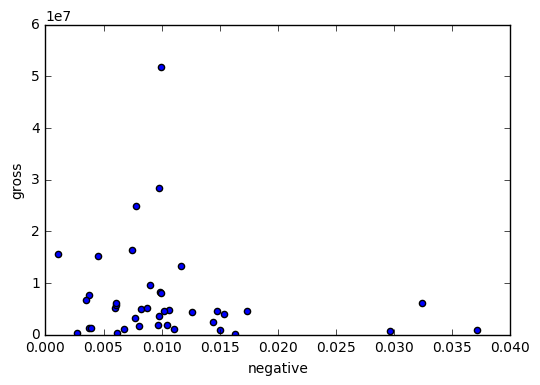

In [8]:
import matplotlib.pyplot as plt
plt.ylabel('gross')
plt.xlabel('negative')
plt.axis([0, 0.04, 0, 60000000])
plt.scatter(data['negative'], data['grossPerDay'])
plt.show()

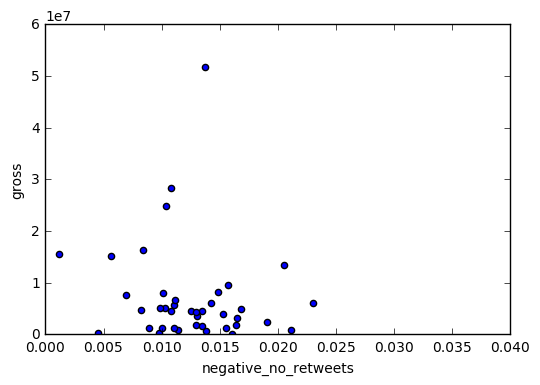

In [9]:
plt.ylabel('gross')
plt.xlabel('negative_no_retweets')
plt.axis([0, 0.04, 0, 60000000])
plt.scatter(data['negative_no_retweets'], data['grossPerDay'])
plt.show()

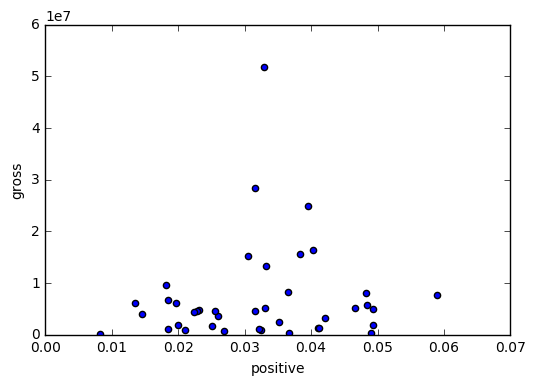

In [10]:
plt.ylabel('gross')
plt.xlabel('positive')
plt.axis([0, 0.07, 0, 60000000])
plt.scatter(data['positive'], data['grossPerDay'])
plt.show()

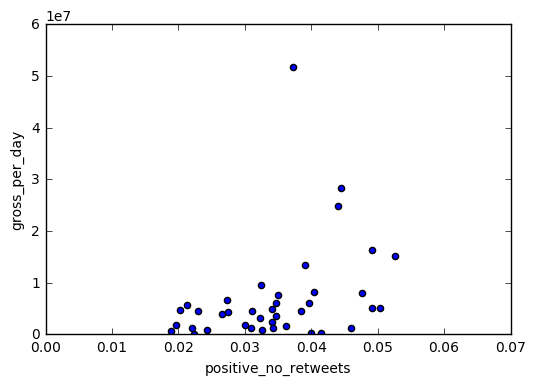

In [11]:
plt.ylabel('gross_per_day')
plt.xlabel('positive_no_retweets')
plt.axis([0, 0.07, 0, 60000000])
plt.scatter(data['positive_no_retweets'], data['grossPerDay'])
plt.show()

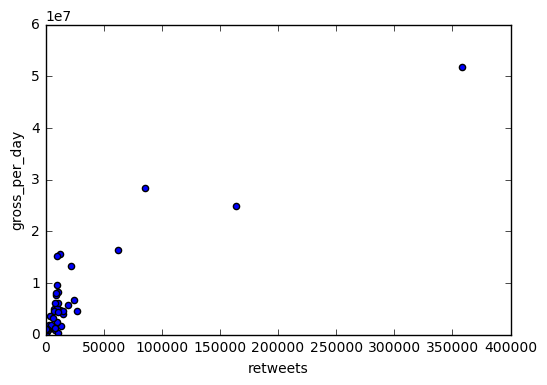

In [12]:
plt.ylabel('gross_per_day')
plt.xlabel('retweets')
plt.axis([0, 400000, 0, 60000000])
plt.scatter(data['retweets'], data['grossPerDay'])
plt.show()

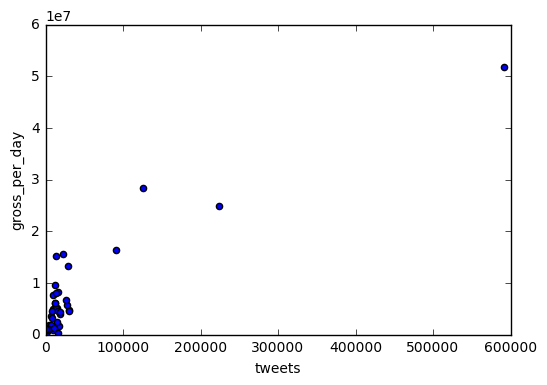

In [13]:
plt.ylabel('gross_per_day')
plt.xlabel('tweets')
plt.axis([0, 600000, 0, 60000000])
plt.scatter(data['tweets'], data['grossPerDay'])
plt.show()

In [14]:
data['percentretweets'] = data.retweets/data.tweets
data.head(numberOfMovies)

,query,tweets,retweets,averageRain,averageSnow,averageTemp,capital,daysInTheater,emoji_count,favorites_per_tweet,...,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,theater_count,gross,grossPerDay,percentretweets
0,#TheAccountant,16708,10957,0.211250,0.00,60.500,0.119949,3,0.002353,1.845403,...,0.009873,0.014885,0.036564,0.040492,0.024308,13,3332.0,24710273.0,8.236758e+06,0.655794
1,#MaxSteel,1781,1301,0.211250,0.00,60.500,0.152754,3,0.002137,0.810219,...,0.029627,0.013817,0.026907,0.018868,0.023416,8,2034.0,2182216.0,7.274053e+05,0.730488
2,#KevinHartWhatNow,18045,14787,0.211250,0.00,60.500,0.146663,3,0.005497,2.458964,...,0.015356,0.015272,0.014558,0.026568,0.029027,16,2567.0,11767210.0,3.922403e+06,0.819451
3,#PricelessTheMovie,975,511,0.211250,0.00,60.500,0.115891,3,0.004280,2.591795,...,0.002734,0.004493,0.049037,0.041449,0.024302,17,303.0,707021.0,2.356737e+05,0.524103
4,#MadeaHalloween,12710,9847,0.311250,0.00,63.625,0.137538,3,0.024375,2.371755,...,0.008981,0.015667,0.018103,0.032449,0.023182,14,2260.0,28501448.0,9.500483e+06,0.774744
5,#JackReacherMovie,10032,8783,0.311250,0.00,63.625,0.144194,3,0.004524,2.181918,...,0.003757,0.006916,0.058994,0.034975,0.022419,16,3780.0,22872490.0,7.624163e+06,0.875498
6,#OuijaMovie,29983,12413,0.311250,0.00,63.625,0.123995,3,0.007021,0.787846,...,0.010599,0.008265,0.023189,0.020216,0.022276,10,3167.0,14065500.0,4.688500e+06,0.414001
7,#KeepingUpWithTheJoneses,3882,2638,0.311250,0.00,63.625,0.153027,3,0.002289,2.365276,...,0.010492,0.012986,0.019934,0.019645,0.020465,23,3022.0,5461475.0,1.820492e+06,0.679547
8,#InfernoMovie,9444,7215,0.111250,0.00,59.000,0.116394,3,0.001504,1.616158,...,0.008232,0.016870,0.049257,0.034024,0.020848,12,3576.0,14860425.0,4.953475e+06,0.763977
9,#GimmeDanger,944,759,0.111250,0.00,59.000,0.151591,3,0.000219,1.344280,...,0.016290,0.016057,0.008255,0.022405,0.020482,11,3.0,44725.0,1.490833e+04,0.804025


In [15]:
percentretweets = data['percentretweets']
data.drop(labels=['percentretweets'], axis=1, inplace=True)
data.insert(3, 'percentretweets', percentretweets)
#del data['gross']
#del data['daysInTheater']
data.head(numberOfMovies)

,query,tweets,retweets,percentretweets,averageRain,averageSnow,averageTemp,capital,daysInTheater,emoji_count,...,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,theater_count,gross,grossPerDay
0,#TheAccountant,16708,10957,0.655794,0.211250,0.00,60.500,0.119949,3,0.002353,...,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,3332.0,24710273.0,8.236758e+06
1,#MaxSteel,1781,1301,0.730488,0.211250,0.00,60.500,0.152754,3,0.002137,...,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2034.0,2182216.0,7.274053e+05
2,#KevinHartWhatNow,18045,14787,0.819451,0.211250,0.00,60.500,0.146663,3,0.005497,...,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,2567.0,11767210.0,3.922403e+06
3,#PricelessTheMovie,975,511,0.524103,0.211250,0.00,60.500,0.115891,3,0.004280,...,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,303.0,707021.0,2.356737e+05
4,#MadeaHalloween,12710,9847,0.774744,0.311250,0.00,63.625,0.137538,3,0.024375,...,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,2260.0,28501448.0,9.500483e+06
5,#JackReacherMovie,10032,8783,0.875498,0.311250,0.00,63.625,0.144194,3,0.004524,...,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,3780.0,22872490.0,7.624163e+06
6,#OuijaMovie,29983,12413,0.414001,0.311250,0.00,63.625,0.123995,3,0.007021,...,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,3167.0,14065500.0,4.688500e+06
7,#KeepingUpWithTheJoneses,3882,2638,0.679547,0.311250,0.00,63.625,0.153027,3,0.002289,...,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,3022.0,5461475.0,1.820492e+06
8,#InfernoMovie,9444,7215,0.763977,0.111250,0.00,59.000,0.116394,3,0.001504,...,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,3576.0,14860425.0,4.953475e+06
9,#GimmeDanger,944,759,0.804025,0.111250,0.00,59.000,0.151591,3,0.000219,...,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,3.0,44725.0,1.490833e+04


In [16]:
del data['query']

<h1 style="color:red">Add Complexity</h1>

In [17]:
data['square_tweets'] = data.tweets**2
data['square_retweets'] = data.retweets**2
data['square_positive'] = data.positive**2
data['square_negative'] = data.negative**2
data['square_positive_no_retweets'] = data.positive_no_retweets**2
data['square_negative_no_retweets'] = data.negative_no_retweets**2
data['square_percentretweets'] = data.percentretweets**2
data['square_capital'] = data.capital**2
data['square_punctuation'] = data.punctuation**2
data['square_emoji_count'] = data.emoji_count**2
data['square_favorites_per_tweet'] = data.favorites_per_tweet**2

data['ab'] = data.tweets*data.retweets
data['ac'] = data.tweets*data.capital
data['ad'] = data.tweets*data.emoji_count
data['ae'] = data.tweets*data.favorites_per_tweet
data['af'] = data.tweets*data.negative
data['ag'] = data.tweets*data.negative_no_retweets
data['ah'] = data.tweets*data.positive
data['ai'] = data.tweets*data.positive_no_retweets
data['aj'] = data.tweets*data.punctuation
data['bc'] = data.retweets*data.capital
data['bd'] = data.retweets*data.emoji_count
data['be'] = data.retweets*data.favorites_per_tweet
data['bf'] = data.retweets*data.negative
data['bg'] = data.retweets*data.negative_no_retweets
data['bh'] = data.retweets*data.positive
data['bi'] = data.retweets*data.positive_no_retweets
data['bj'] = data.retweets*data.punctuation
data['cd'] = data.capital*data.emoji_count
data['ce'] = data.capital*data.favorites_per_tweet
data['cf'] = data.capital*data.negative
data['cg'] = data.capital*data.negative_no_retweets
data['ch'] = data.capital*data.positive
data['ci'] = data.capital*data.positive_no_retweets
data['cj'] = data.capital*data.punctuation
data['de'] = data.emoji_count*data.favorites_per_tweet
data['df'] = data.emoji_count*data.negative
data['dg'] = data.emoji_count*data.negative_no_retweets
data['dh'] = data.emoji_count*data.positive
data['di'] = data.emoji_count*data.positive_no_retweets
data['dj'] = data.emoji_count*data.punctuation
data['ef'] = data.favorites_per_tweet*data.negative
data['eg'] = data.favorites_per_tweet*data.negative_no_retweets
data['eh'] = data.favorites_per_tweet*data.positive
data['ei'] = data.favorites_per_tweet*data.positive_no_retweets
data['ej'] = data.favorites_per_tweet*data.punctuation
data['fg'] = data.negative*data.negative_no_retweets
data['fh'] = data.negative*data.positive
data['fi'] = data.negative*data.positive_no_retweets
data['fj'] = data.negative*data.punctuation
data['gh'] = data.negative_no_retweets*data.positive
data['gi'] = data.negative_no_retweets*data.positive_no_retweets
data['gj'] = data.negative_no_retweets*data.punctuation
data['hi'] = data.positive*data.positive_no_retweets
data['hj'] = data.positive*data.punctuation
data['ij'] = data.positive_no_retweets*data.punctuation
data['ak'] = data.tweets*data.theater_count
data['bk'] = data.retweets*data.theater_count
data['ck'] = data.capital*data.theater_count
data['dk'] = data.emoji_count*data.theater_count
data['ek'] = data.favorites_per_tweet*data.theater_count
data['fk'] = data.negative*data.theater_count
data['gk'] = data.negative_no_retweets*data.theater_count
data['hk'] = data.positive*data.theater_count
data['ik'] = data.positive_no_retweets*data.theater_count
data['jk'] = data.punctuation*data.theater_count
data['al'] = data.tweets*data.daysInTheater
data['bl'] = data.retweets*data.daysInTheater
data['cl'] = data.capital*data.daysInTheater
data['dl'] = data.emoji_count*data.daysInTheater
data['el'] = data.favorites_per_tweet*data.daysInTheater
data['fl'] = data.negative*data.daysInTheater
data['gl'] = data.negative_no_retweets*data.daysInTheater
data['hl'] = data.positive*data.daysInTheater
data['il'] = data.positive_no_retweets*data.daysInTheater
data['jl'] = data.punctuation*data.daysInTheater
data['kl'] = data.theater_count*data.daysInTheater
data['am'] = data.tweets*data.averageTemp
data['bm'] = data.retweets*data.averageTemp
data['cm'] = data.capital*data.averageTemp
data['dm'] = data.emoji_count*data.averageTemp
data['em'] = data.favorites_per_tweet*data.averageTemp
data['fm'] = data.negative*data.averageTemp
data['gm'] = data.negative_no_retweets*data.averageTemp
data['hm'] = data.positive*data.averageTemp
data['im'] = data.positive_no_retweets*data.averageTemp
data['jm'] = data.punctuation*data.averageTemp
data['km'] = data.theater_count*data.averageTemp
data['lm'] = data.daysInTheater*data.averageTemp
data['an'] = data.tweets*data.averageRain
data['bn'] = data.retweets*data.averageRain
data['cn'] = data.capital*data.averageRain
data['dn'] = data.emoji_count*data.averageRain
data['en'] = data.favorites_per_tweet*data.averageRain
data['fn'] = data.negative*data.averageRain
data['gn'] = data.negative_no_retweets*data.averageRain
data['hn'] = data.positive*data.averageRain
data['in'] = data.positive_no_retweets*data.averageRain
data['jn'] = data.punctuation*data.averageRain
data['kn'] = data.theater_count*data.averageRain
data['ln'] = data.daysInTheater*data.averageRain
data['mn'] = data.averageTemp*data.averageRain
data['ao'] = data.tweets*data.averageSnow
data['bo'] = data.retweets*data.averageSnow
data['co'] = data.capital*data.averageSnow
data['do'] = data.emoji_count*data.averageSnow
data['eo'] = data.favorites_per_tweet*data.averageSnow
data['fo'] = data.negative*data.averageSnow
data['go'] = data.negative_no_retweets*data.averageSnow
data['ho'] = data.positive*data.averageSnow
data['io'] = data.positive_no_retweets*data.averageSnow
data['jo'] = data.punctuation*data.averageSnow
data['ko'] = data.theater_count*data.averageSnow
data['lo'] = data.daysInTheater*data.averageSnow
data['mo'] = data.averageTemp*data.averageSnow
data['no'] = data.averageRain*data.averageSnow
data.head(numberOfMovies)

,tweets,retweets,percentretweets,averageRain,averageSnow,averageTemp,capital,daysInTheater,emoji_count,favorites_per_tweet,...,eo,fo,go,ho,io,jo,ko,lo,mo,no
0,16708,10957,0.655794,0.211250,0.00,60.500,0.119949,3,0.002353,1.845403,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000
1,1781,1301,0.730488,0.211250,0.00,60.500,0.152754,3,0.002137,0.810219,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000
2,18045,14787,0.819451,0.211250,0.00,60.500,0.146663,3,0.005497,2.458964,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000
3,975,511,0.524103,0.211250,0.00,60.500,0.115891,3,0.004280,2.591795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000
4,12710,9847,0.774744,0.311250,0.00,63.625,0.137538,3,0.024375,2.371755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000
5,10032,8783,0.875498,0.311250,0.00,63.625,0.144194,3,0.004524,2.181918,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000
6,29983,12413,0.414001,0.311250,0.00,63.625,0.123995,3,0.007021,0.787846,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000
7,3882,2638,0.679547,0.311250,0.00,63.625,0.153027,3,0.002289,2.365276,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000
8,9444,7215,0.763977,0.111250,0.00,59.000,0.116394,3,0.001504,1.616158,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000
9,944,759,0.804025,0.111250,0.00,59.000,0.151591,3,0.000219,1.344280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000


In [18]:
print data.grossPerDay.mean()

7162685.67


<h1 style="color:orange">Sklearn Stuff</h1>

<h1 style="color:red">Linear Regression</h1>

In [22]:
total_data = data.values
f_col = ['square_tweets', 'square_retweets','averageTemp', 'tweets', 'retweets', 'square_emoji_count', 'square_positive_no_retweets',
         'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'am', 
         'bd', 'bh', 'bj', 'bl', 'bm', 'bk']
X = data[f_col]
y = data[['grossPerDay']]
from sklearn import preprocessing
#data_to_scale = total_data[:,:12]
#print(X.head())
scaled_X = preprocessing.scale(X)
#print(scaled_X)

from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=1)

# testing on traning set:
X_train = scaled_X
y_train = y
X_test = scaled_X
y_test = y


from sklearn.linear_model import LinearRegression
from sklearn import metrics
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print (clf.intercept_)
print (clf.coef_)
print np.sqrt(((y_test-y_pred)**2).mean())

[ 7162685.67000028]
[[  2.51774650e+09   1.99547250e+09   1.26513117e+06   8.69375480e+08
   -7.36041644e+08   3.59232819e+06   1.73055680e+06  -4.53759609e+09
    1.12032663e+07  -1.88029953e+07  -8.27523933e+06  -5.65807234e+06
    6.43379020e+06  -1.44819231e+08   2.94567899e+07  -5.09862962e+08
   -1.79277056e+08  -1.13525829e+08  -5.45644844e+06   1.08872153e+08
    4.33956263e+08   1.84463146e+07   7.17234285e+07   2.06652130e+08]]
grossPerDay    1.313390e+06
dtype: float64


<h1 style="color:red">Logistic Regression</h1>

In [ ]:
def split_gross_categories(value):
    if value < 1000000:
        return 0
    elif value < 3000000:
        return 1
    elif value < 10000000:
        return 2
    else:
        return 3

data['grossByCategory'] = 0

f=lambda x: split_gross_categories(x)
data.grossByCategory = data.grossPerDay.map(f)
data.head(numberOfMovies)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
f_col = ['tweets', 'positive', 'negative']
X = data[f_col]
y = data[['grossByCategory']]
scaled_X = preprocessing.scale(X)
clf = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=2)
clf.fit(X_train, y_train)
output = clf.predict(X_test)
print metrics.accuracy_score(y_test, output)

In [ ]:
clf.predict(X_test)

In [ ]:
y_test

In [ ]:
plt.ylabel('grossCategories')
plt.xlabel('retweets')
plt.scatter(data['retweets'], data['grossByCategory'])
plt.show()

<h1 style="color:red">Cross Validation</h1>

In [ ]:
from sklearn.cross_validation import cross_val_score
f_col = ['averageTemp', 'tweets', 'retweets', 'square_emoji_count', 'square_positive_no_retweets',
         'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'am', 
         'bd', 'bh', 'bj', 'bl', 'bm', 'bk']
X = data[f_col]
print (X.shape)
y=data['grossPerDay']
print (y.shape)

In [ ]:
my_linreg = LinearRegression()
scaled_X = preprocessing.scale(X)
mse_list = cross_val_score(my_linreg, scaled_X, y, cv=40, scoring='mean_squared_error')
print(mse_list)

In [ ]:
mse_list_positive = -mse_list

In [ ]:
import numpy as np
rmse_list = np.sqrt(mse_list_positive)
print rmse_list

In [ ]:
print (rmse_list.mean())